In [1]:
import numpy as np
import matplotlib.pyplot as plt

Loading the experimental data

In [2]:
energies = np.load('exp_energy_rep_1_ibmq_guadalupe.npy')

Given that we remove orbitals in order to reduce the number of qubits, we have a shift in the energy.

In [3]:
ΔE = -6.792223823484351

In [4]:
energies = 2**10*energies/2**13 # fixing a normalization error that had the first version of the VQE class

The energy was evaluated 351 times. the first 50 were to calibrate the classical optimizer (SPSA), then 2 for each iteration of the algorithm (150 iterations), and finally one to evaluate the minimum energy. 

In [5]:
n = int((len(energies) - 50 - 1) / 2 + 1)
len(energies)

351

In [6]:
energy = ΔE - 1.089782485053685

In [7]:
fun = lambda x : 50*9+2*9*x
funi = lambda x : (x-50*9)/2*9

In [8]:
fun2 = lambda x : 50*25+2*25*x
funi2 = lambda x : (x-50*25)/2*25

In [9]:
plus = ΔE + energies[50:350:2]
minus = ΔE + energies[51:350:2]
final = ΔE + energies[-1]

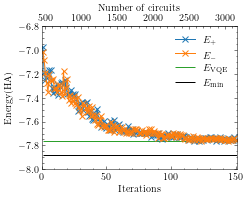

In [30]:
styles = ['science']
prefix = '../stylelib/'
sufix = '.mplstyle'

for i in range(len(styles)):
    styles[i] = prefix + styles[i] + sufix

plt.style.use(styles)

fig, ax = plt.subplots()
ax.plot(range(1,n),plus,'-x', label=r'$E_+$')
ax.plot(range(1,n),minus,'-x', label=r'$E_-$')
# ax.plot(151,final,'-o',label=r'$E_{\rm vqe}$')
ax.hlines(final,1,n,color='tab:green',label=r'$E_{\rm VQE}$')
ax.hlines(energy,1,n,color='k', label=r'$E_{\rm min}$')
ax.set_xlabel('Iterations')
ax.set_ylabel('Energy(HA)')
ax.set_ylim(-8,-6.8)

ax.xaxis.set_ticks_position('bottom')
ax.set_xlim([0, n])

ax.legend()
secax = ax.secondary_xaxis('top',functions=(fun,funi))
secax.set_xlabel('Number of circuits')

plt.savefig( '../../Figures/Experiment.pdf')

In [13]:
import qiskit.tools.jupyter
%qiskit_version_table